In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Color mapping
tile_colors = {
    1: (1, 0, 0),    # Red for 1x1
    2: (0, 0, 1),    # Blue for 2x2
    3: (1, 1, 0),    # Yellow for 3x3
    4: (0, 1, 0)     # Green for 4x4
    }

In [ ]:
def is_valid(grid, x, y, size):
    #Check if a tile of 'size' can be placed at (x,y).
    M, N = grid.shape
    if x + size > M or y + size > N:
        return False
    for i in range(size):
        for j in range(size):
            if grid[x + i, y + j] != -1:
                return False
    return True

In [ ]:
def place_tile(grid, x, y, size):
    #Place a tile of given size starting at (x,y).
    for i in range(size):
        for j in range(size):
            grid[x + i, y + j] = size

In [ ]:
def generate_spiral_coords(M, N):
    #Generate coordinates in spiral order starting from center.
    cx, cy = M // 2, N // 2
    x, y = cx, cy
    dx, dy = 0, -1
    for _ in range(max(M, N)**2):
        if 0 <= x < M and 0 <= y < N:
            yield x, y
        if (x == y) or (x < 0 and x == -y) or (x > 0 and x == 1-y):
            dx, dy = -dy, dx
        x, y = x + dx, y + dy

In [ ]:
def create_spiral_fill(M, N):
    grid = np.full((M, N), -1, dtype=int)
    tile_counts = {1: 0, 2: 0, 3: 0, 4: 0}
    for x, y in generate_spiral_coords(M, N):
        if grid[x, y] == -1:
            for size in [4, 3, 2, 1]:
                if is_valid(grid, x, y, size):
                    place_tile(grid, x, y, size)
                    tile_counts[size] += 1
                    break
    return grid, tile_counts

In [ ]:
def visualize_room(grid, tile_counts):
    M, N = grid.shape
    fig, ax = plt.subplots()
    for i in range(M):
        for j in range(N):
            val = grid[i, j]
            if val != -1:
                color = tile_colors[val]
                rect = plt.Rectangle((j, M - 1 - i), 1, 1, facecolor=color, edgecolor='black')
                ax.add_patch(rect)

    ax.set_xlim(0, N)
    ax.set_ylim(0, M)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(N) + 0.5, minor=True)
    ax.set_yticks(np.arange(M) + 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    plt.title(f"Room Tiling (M={M}, N={N})\n"
              f"Tile Counts: 1x1={tile_counts[1]}, 2x2={tile_counts[2]}, 3x3={tile_counts[3]}, 4x4={tile_counts[4]}")
    plt.show()

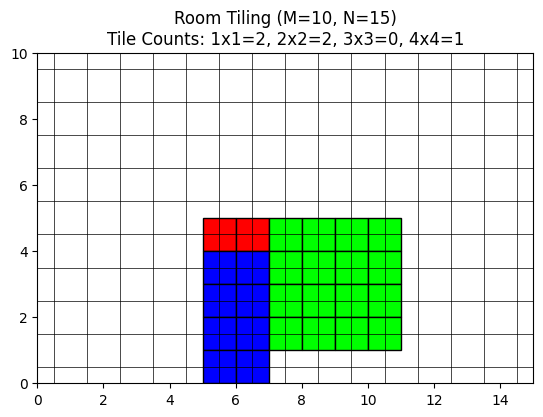

In [45]:
# Example usage
M, N = 10, 15
room_grid, tile_counts = create_spiral_fill(M, N)
visualize_room(room_grid, tile_counts)